# AI Model to Recognize Handwritten English Letters & Numbers 

## Introduction
This dataset contains a diverse collection of **handwritten English characters and digits**, including:
- Uppercase letters (A-Z)
- Lowercase letters (a-z)
- Numerical digits (0-9)

It is designed to support research and development in:
- Optical Character Recognition (OCR)
- Handwriting recognition
- Machine Learning


## Purpose

The dataset is ideal for:

- **Training and Evaluating OCR Models**: Recognize handwritten English text accurately.
- **Developing Handwriting Recognition Systems**: Useful in processing handwritten forms and documents.
- **Benchmarking**: Compare different algorithms and model performances.


## Usage

- **Machine Learning**: Use for training image classification models.
- **Data Augmentation**: Apply transformations to increase dataset diversity and model generalization.
- **Feature Extraction**: Identify and analyze patterns in handwritten characters.

---

> 💡 This dataset provides a comprehensive resource for academic and practical work in handwriting-based AI applications.


## Import libraries

In [4]:
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np



## Load the Data

In [6]:

path = ("E:\JEC Internship\Dataset\archive1\handwritten-english-characters-and-digits")

print("Path to dataset files:", path)

Path to dataset files: E:\JEC Internship\Datasetrchive1\handwritten-english-characters-and-digits


In [7]:
import os
# Fix the path variable to use a raw string
path = r"E:\JEC Internship\Dataset\archive1\handwritten-english-characters-and-digits"
print("Files in dataset folder:")
print(os.listdir(path))

Files in dataset folder:
['combined_folder']


In [8]:
train_dir = r"E:\JEC Internship\Dataset\archive1\handwritten-english-characters-and-digits\combined_folder\train"
test_dir  = r"E:\JEC Internship\Dataset\archive1\handwritten-english-characters-and-digits\combined_folder\test"
augmented_data = r"E:\JEC Internship\Dataset\archive1\augmented_images"

## Data Preprocessing

In [10]:
train_ds=tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(64,64),
    batch_size=32,
    label_mode='categorical'
)

Found 2728 files belonging to 62 classes.


In [11]:
augmented_ds=tf.keras.utils.image_dataset_from_directory(
    augmented_data,
    image_size=(64,64),
    batch_size=32,
    label_mode='categorical'
)

Found 13640 files belonging to 62 classes.


In [12]:
test_ds=tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(64,64),
    batch_size=32,
    label_mode='categorical'
)

Found 682 files belonging to 62 classes.


## Visualize the Images

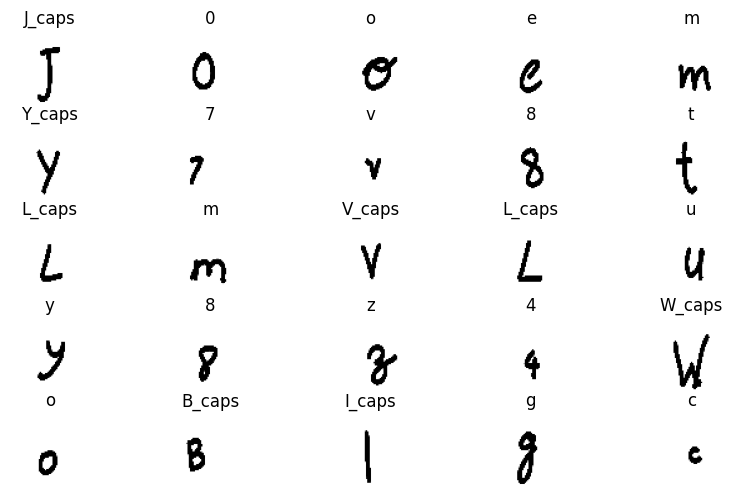

In [14]:
class_names = train_ds.class_names
# print(class_names)

# Take 1 batch from the dataset
for images, labels in train_ds.take(1):
    plt.figure(figsize=(10, 6))
    for i in range(25):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        label_index = tf.argmax(labels[i]).numpy()
        plt.title(class_names[label_index])
        plt.axis("off")


 ## Model Building

In [16]:
# Improved model with less regularization
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(64, 64, 3)),
    
    # Block 1
    layers.Conv2D(32, (3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.1),
    
    # Block 2
    layers.Conv2D(64, (3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.1),
    
    # Block 3
    layers.Conv2D(128, (3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.15),
    
    # Block 4
    layers.Conv2D(256, (3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.15),
    
    # Dense Layers
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(62, activation='softmax')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64, 64, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 2,638,334 (10.06 MB)

 Trainable params: 2,635,838 (10.05 MB)

 Non-trainable params: 2,496 (9.75 KB)

In [23]:

# Ensure test_ds is defined (run this only if you get NameError)
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(64,64),
    batch_size=32,
    label_mode='categorical'
)

# Compile with lower learning rate
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Training with class weights
history=model.fit(
    augmented_ds,
    validation_data=test_ds,
    epochs=50,
    # class_weight='balanced',  # Handle class imbalance
    callbacks=[
        # Early stopping to prevent overfitting
        tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
        # Reduce learning rate on plateau
        tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5, min_lr=1e-7)
    ]
)

Found 682 files belonging to 62 classes.
Epoch 1/50
427/427 ━━━━━━━━━━━━━━━━━━━━ 136s 311ms/step - accuracy: 0.0970 - loss: 3.7313 - val_accuracy: 0.0469 - val_loss: 5.1196 - learning_rate: 1.0000e-04
Epoch 2/50
427/427 ━━━━━━━━━━━━━━━━━━━━ 105s 245ms/step - accuracy: 0.2466 - loss: 2.8732 - val_accuracy: 0.3578 - val_loss: 2.2054 - learning_rate: 1.0000e-04
Epoch 3/50
427/427 ━━━━━━━━━━━━━━━━━━━━ 101s 236ms/step - accuracy: 0.3789 - loss: 2.2283 - val_accuracy: 0.6173 - val_loss: 1.3677 - learning_rate: 1.0000e-04
Epoch 4/50
427/427 ━━━━━━━━━━━━━━━━━━━━ 102s 238ms/step - accuracy: 0.4903 - loss: 1.7993 - val_accuracy: 0.7082 - val_loss: 1.0130 - learning_rate: 1.0000e-04
Epoch 5/50
427/427 ━━━━━━━━━━━━━━━━━━━━ 102s 239ms/step - accuracy: 0.5635 - loss: 1.5080 - val_accuracy: 0.7155 - val_loss: 0.9531 - learning_rate: 1.0000e-04
Epoch 6/50
427/427 ━━━━━━━━━━━━━━━━━━━━ 101s 236ms/step - accuracy: 0.6167 - loss: 1.3114 - val_accuracy: 0.7713 - val_loss: 0.7420 - learning_rate: 1.0000e-04

## Model Evaluation

In [25]:
loss, accuracy = model.evaluate(test_ds)
print(f"Validation Accuracy: {accuracy*100:.2f}%")


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.8687 - loss: 0.4446 
Validation Accuracy: 88.42%


## Results Visualization

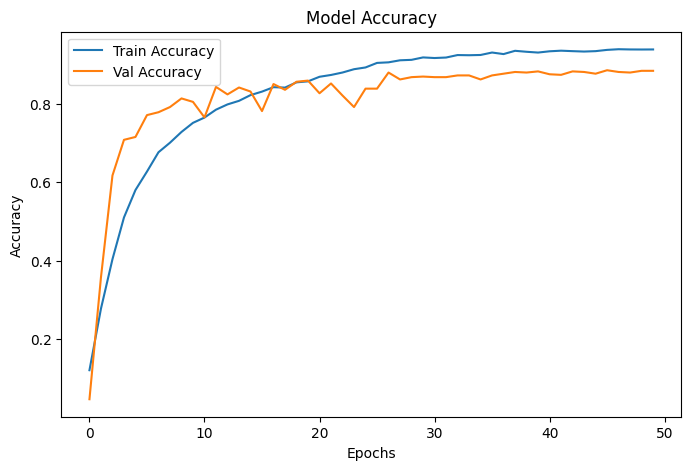

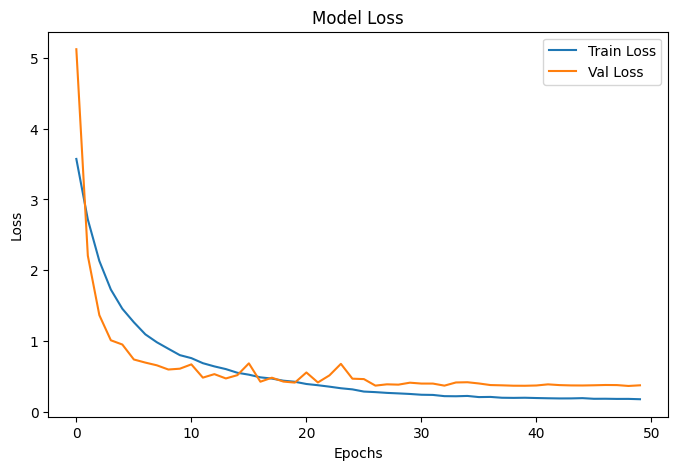

In [26]:
# Accuracy
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Sample Predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


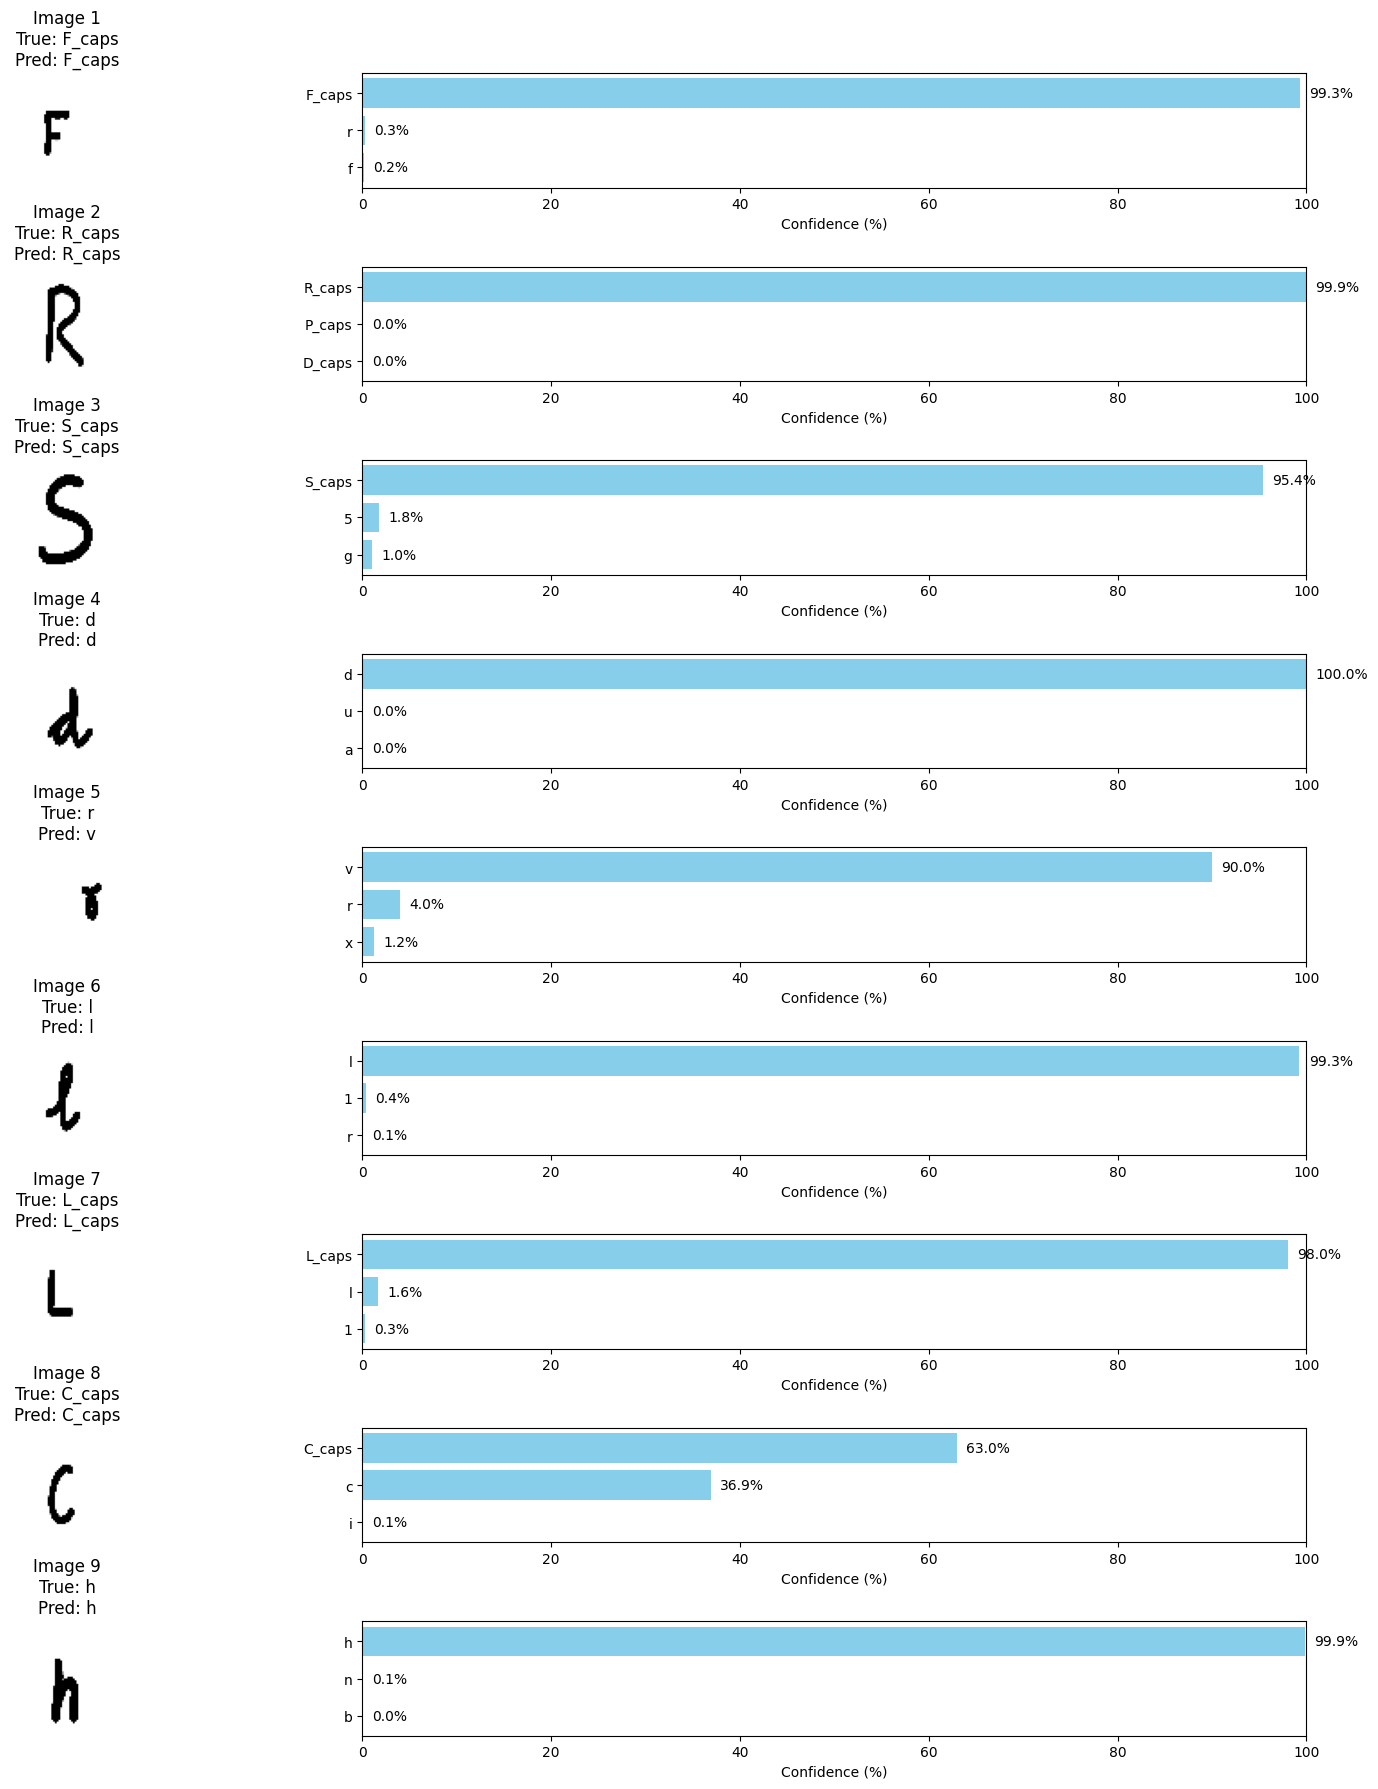

In [27]:
# Get class names
class_names = test_ds.class_names if hasattr(test_ds, 'class_names') else [str(i) for i in range(62)]

# Take one batch of images and labels
for images, labels in test_ds.take(1):
    preds = model.predict(images)

    # Predicted class index
    pred_classes = np.argmax(preds, axis=1)

    # Convert true labels to integer indices if needed
    if labels.ndim > 1:
        true_classes = np.argmax(labels.numpy(), axis=1)
    else:
        true_classes = labels.numpy()

    # Show 9 predictions with top-3 probability bars
    plt.figure(figsize=(18, 18))
    for i in range(9):
        # -------- Image Plot --------
        plt.subplot(9, 2, 2*i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis('off')
        plt.title(f"Image {i+1}\nTrue: {class_names[int(true_classes[i])]}\nPred: {class_names[int(pred_classes[i])]}")

        # -------- Probability Bar Plot --------
        top3_idx = np.argsort(preds[i])[-3:][::-1]  # Top 3 class indices
        top3_probs = preds[i][top3_idx]
        top3_labels = [class_names[j] for j in top3_idx]

        plt.subplot(9, 2, 2*i + 2)
        bars = plt.barh(top3_labels, top3_probs * 100, color='skyblue')
        plt.xlim(0, 100)
        plt.xlabel("Confidence (%)")
        plt.gca().invert_yaxis()  # Highest on top

        for bar in bars:
            width = bar.get_width()
            plt.text(width + 1, bar.get_y() + bar.get_height()/2,
                     f"{width:.1f}%", va='center')

    plt.tight_layout()
    plt.show()


## Save the Model

In [36]:
model.save("handwritten_cnn_model_2.h5")